 # Regression Machine Learning Project for Prediction Bulldozer Prices 🚜🚜

A supervised machine learning project on predicting bulldozer prices for the future given a group of its characteristics in respect to some old selling prices as contained in the dataset.

Find the data here : https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

#### Data
- Train.csv is the training set, which contains data through the end of 2011.

- Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

- Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
The key fields are in train.csv are:

- SalesID: the uniue identifier of the sale
- MachineID: the unique identifier of a machine.  A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)
- saledate: the date of the sale

There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.
The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).

In [4]:
# Basic Data Analysis and ML Libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
# Importing Training and Validation sets respectively
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [8]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [9]:
df.Drive_System.value_counts()

Two Wheel Drive     47546
Four Wheel Drive    33551
No                  25166
All Wheel Drive       824
Name: Drive_System, dtype: int64

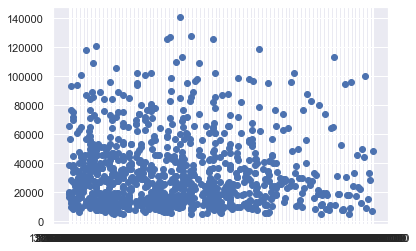

In [10]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

<AxesSubplot:ylabel='Frequency'>

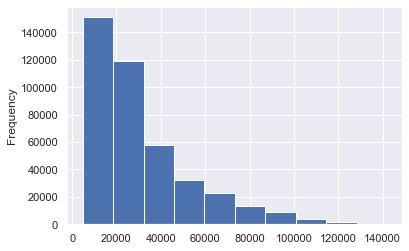

In [11]:
df.SalePrice.plot.hist()

### Parsing the Dates

This is very important when working with times series data so that we can get much information from it as well.

In [12]:
# Reimport that data but now with parsed dates
df = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [13]:
df.saledate.dtype

dtype('<M8[ns]')

In [14]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

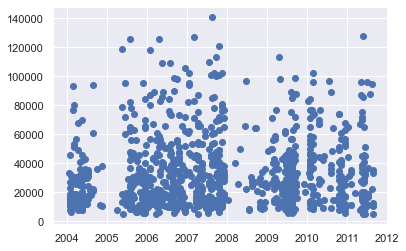

In [15]:
# Making the plot again
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

In [16]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting,NaN,NaN,NaN,NaN,NaN
Blade_Type,NaN,NaN,NaN,NaN,NaN
Travel_Controls,NaN,NaN,NaN,NaN,NaN
Differential_Type,Standard,Standard,NaN,NaN,NaN


In [17]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sorting dataframe by dates

Always sort time series data by date and alway parse them too.

In [18]:
# Sorting
df.sort_values(by=['saledate'], inplace=True, ascending=True)

In [19]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original Dataframe

This is a very good practice for data scientists

In [20]:
df_copy = df.copy()

## Feature Engineering

Creating a new feature, changing an existing feature etc

In [21]:
# Adding datetime attribute for the saledate attribute

df_copy['saleYear'] = df_copy.saledate.dt.year

In [22]:
# Adding datetime attribute for the saledate attribute
df_copy['saleMonth'] = df_copy.saledate.dt.month
df_copy['saleDay'] = df_copy.saledate.dt.day
df_copy['saleDayOfWeek'] = df_copy.saledate.dt.day_of_week
df_copy['saleDayOfYear'] = df_copy.saledate.dt.day_of_year

In [23]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
saleYear,1989,1989,1989,1989,1989
saleMonth,1,1,1,1,1
saleDay,17,31,31,31,31
saleDayOfWeek,1,1,1,1,1


In [24]:
# Drop the saledate to avoid redundancy
df_copy.drop('saledate', axis=1, inplace=True)

In [25]:
# checking the values along different columns
df_copy.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [26]:
pd.crosstab(df_copy.SalePrice, df_copy.state)

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,Unspecified,Utah,Vermont,Virginia,Washington,Washington DC,West Virginia,Wisconsin,Wyoming
SalePrice,,,,,,,,,,,,,,,,,,,,,
4750.0,4,0,3,1,26,4,6,0,15,5,...,13,1,0,0,1,13,0,0,0,0
4800.0,0,0,0,2,0,0,3,0,3,1,...,0,0,0,0,0,0,0,0,0,0
4850.0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4900.0,0,0,0,1,0,0,3,0,4,0,...,2,0,0,0,0,0,0,0,1,0
4935.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138900.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139000.0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
140000.0,5,0,10,1,9,5,0,0,17,5,...,23,1,0,0,0,1,0,0,0,1


## Machine Learning Modelling Section

Using all other columns to predict 'salePrice'

From the sklearn machine learning map, we can use `RandomForestRegressor()` as our **BASE MODEL**
- 

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
# Allows the model to use as many rows as possible in my computer
model = RandomForestRegressor(n_jobs=1, random_state=42)

### Data Cleaning

1. Addressing missing rows
2. Converting non-numerical to numeric
    * Convert them to pandas categories and then to numeric

In [29]:
# Find columns which contains strings
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
# Convert stringd to categories
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype('category').cat.as_ordered()

In [31]:
# Verify
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [32]:
df_copy.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [33]:
df_copy.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

#### Addressing Missing data

In [34]:
 # Save/Export the current dataframe 
df_copy.to_csv('bluebook-for-bulldozers/df_copy.csv', index=False)

In [35]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Fill Missing Values Starting with the Numeric types

In [36]:
# finding the numeric columns
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [37]:
# Check for columns with null values
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [38]:
# Fill numeric rows with the median
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column that tells us if the content was missing initially
            df_copy[label +'_was_missing'] = pd.isnull(content)
            # fill the missing numeric values with median
            df_copy[label] = content.fillna(content.median())


In [39]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
saleDay,17,31,31,31,31
saleDayOfWeek,1,1,1,1,1
saleDayOfYear,17,31,31,31,31
auctioneerID_was_missing,False,False,False,False,False


### Filling and Turning Categorical Variables into numbers

In [40]:
# find non numeric content 
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [41]:
# Turning categorical columns into numbers and fill out the missing values
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_copy[label+'_is_missing'] = pd.isnull(content)
        # Turn ctegories into numbers and add + 1
        df_copy[label] = pd.Categorical(content).codes + 1


In [42]:
df_copy

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,True,True,False,False,False,True,True
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,True,True
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,True,True
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,True,True


In [43]:
# check
df_copy.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [44]:
# check again
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


## Modelling Proper

Split the DataSet into it's three(3) essential components;
1. Training Set
2. Validation Set
3. Test Set

The goal is to get a very good **GENERALIZATION**

In [45]:
## Split to trai and validation sets
df_valid = df_copy[df_copy.saleYear == 2012]
df_train = df_copy[df_copy.saleYear != 2012]

In [46]:
# Checking the lengths of both
len(df_train), len(df_valid)

(401125, 11573)

In [47]:
# Splitting into X and y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_valid.drop("SalePrice", axis=1), df_valid.SalePrice

In [48]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building a custom evaluation function

Because this project on Kaggle demands we use Root Mean Squared Log Error (RMSLE) as our evaluation metric, and it is not a default evaluation metric in sklearn.

In [49]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle (y_test, y_pred):
    """
    Calculates RMSLE between predictions and true values
    """
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

In [50]:
# Function for evaluating multiple models
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Valid MAE': mean_absolute_error(y_valid, val_preds),
              'Training RMSLE': rmsle(y_train, train_preds),
              'Valid RMSLE': rmsle(y_valid, val_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Valid R^2': r2_score(y_valid, val_preds)}
    return scores

### Testing the model on a subset of date to save time because of the size

In [51]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [52]:
%%time
model.fit(X_train, y_train)

Wall time: 23.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [53]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter Tuning with RandomizedSearchCv

In [54]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different hyperparameters
rf_grid =  {'n_estimators': np.arange(10,100,10),
            'max_depth': [None, 3, 5, 10],
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1, 20, 2),
            'max_features':[0.5, 1, "sqrt", "auto"],
            'max_samples':[10000]}

# instantiate the rscv model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
            param_distributions = rf_grid, n_iter=2, cv=5, verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 1min 35s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [55]:
# finding the best parameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [56]:
# evaluating the model
show_scores(rs_model)

{'Training MAE': 11940.809149980892,
 'Valid MAE': 13947.492693149048,
 'Training RMSLE': 0.5162610222196796,
 'Valid RMSLE': 0.5335862335188345,
 'Training R^2': 0.4732138587988417,
 'Valid R^2': 0.4566936812897263}

### Train the model with the best hyperparameters

In [57]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, min_impurity_split=14, max_features=0.5,n_jobs=-1, max_samples=None)

# fit the model
ideal_model.fit(X_train, y_train)

c:\Users\JohnIgoche\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
c:\Users\JohnIgoche\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
c:\Users\JohnIgoche\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
c:\Users\JohnIgoche\anaconda3\lib\site-pack

Wall time: 1min 49s


RandomForestRegressor(max_features=0.5, min_impurity_split=14, n_estimators=40,
                      n_jobs=-1)

In [58]:
show_scores(ideal_model)

{'Training MAE': 1613.5841159073443,
 'Valid MAE': 6004.403726345805,
 'Training RMSLE': 0.08611728794827152,
 'Valid RMSLE': 0.24789394693878805,
 'Training R^2': 0.9869433306324384,
 'Valid R^2': 0.879777073531793}

In [59]:
show_scores(rs_model)

{'Training MAE': 11940.809149980892,
 'Valid MAE': 13947.492693149048,
 'Training RMSLE': 0.5162610222196796,
 'Valid RMSLE': 0.5335862335188345,
 'Training R^2': 0.4732138587988417,
 'Valid R^2': 0.4566936812897263}

### Making Predictions

In [60]:
# Importing the test data
df_test = pd.read_csv('bluebook-for-bulldozers/Test.csv', low_memory=False, parse_dates=['saledate'])

In [61]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

### Preprocessing the Test Dataset

In [63]:
def preprocess_data(df):
    """
    Preprocess data to return the cleaned dataset
    """
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.day_of_week
    df['saleDayOfYear'] = df.saledate.dt.day_of_year
    df['saleYear'] = df.saledate.dt.year
    df.drop('saledate', axis=1, inplace=True)

    # fill the numeric rows with median 
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column that tells us if the content was missing initially
                df[label +'_was_missing'] = pd.isnull(content)
                # fill the missing numeric values with median
                df[label] = content.fillna(content.median())

    # filll categorical missing data and turned into numbers
    # for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df[label+'_is_missing'] = pd.isnull(content)
        # Turn ctegories into numbers and add + 1
        df[label] = pd.Categorical(content).codes + 1
    
    return df

    

In [64]:
# Processed test data
df_test = preprocess_data(df_test)

In [65]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,saleYear,MachineHoursCurrentMeter_was_missing
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,5,3,3,124,2012,False
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,Standard,Conventional,5,10,3,131,2012,False
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,5,10,3,131,2012,False
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,5,10,3,131,2012,False
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,PAT,None or Unspecified,NaN,NaN,5,10,3,131,2012,False


In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 57 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SalesID                               12457 non-null  int64  
 1   MachineID                             12457 non-null  int64  
 2   ModelID                               12457 non-null  int64  
 3   datasource                            12457 non-null  int64  
 4   auctioneerID                          12457 non-null  int64  
 5   YearMade                              12457 non-null  int64  
 6   MachineHoursCurrentMeter              12457 non-null  float64
 7   UsageBand                             1834 non-null   object 
 8   fiModelDesc                           12457 non-null  object 
 9   fiBaseModel                           12457 non-null  object 
 10  fiSecondaryDesc                       8482 non-null   object 
 11  fiModelSeries  

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(2), int16(4), int64(10), int8(40)
memory usage: 75.7 MB


In [68]:
df_copy.to_csv(
"df_copy.csv.gzip", index=False, compression="gzip"
)